In [1]:
TRAIN_PATH = 'data/processed_data/train.jsonl'
TEST_PATH = 'data/processed_data/test.jsonl'
DEV_PATH = 'data/processed_data/dev.jsonl'

In [2]:
# function read jsonl file as dataframe
import pandas as pd
import json

def read_jsonl_to_dataframe(file_path):
    data = []

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                json_obj = json.loads(line)
                data.append(json_obj)
            except json.JSONDecodeError as e:
                print(f"Skipping invalid JSON: {e}")

    df = pd.DataFrame(data)

    return df

In [3]:
df_train = read_jsonl_to_dataframe(TRAIN_PATH)
df_test = read_jsonl_to_dataframe(TEST_PATH)
df_dev = read_jsonl_to_dataframe(DEV_PATH)

In [4]:
# this process just for aspect extraction

df_train.labels = df_train.labels.apply(lambda label: [ap.split('#')[1] if ap != 'O' else ap for ap in label])
df_test.labels = df_test.labels.apply(lambda label: [ap.split('#')[1] if ap != 'O' else ap for ap in label])
df_dev.labels = df_dev.labels.apply(lambda label: [ap.split('#')[1] if ap != 'O' else ap for ap in label])

In [5]:
def print_data(df, index):
    print(f'Index: {index}')

    columns = df.columns

    for column in columns:
        print(f'{column}: {df[column][index]}')

    print('\n')
    print("\n=============================================================================================\n")

def print_df(df):
    for i in range(len(df)):
        print_data(df, i)
        
# check data
def check_data():
    check_train = len(df_train[df_train.text.map(len) != df_train.labels.map(len)]) == 0
    check_test = len(df_test[df_test.text.map(len) != df_test.labels.map(len)]) == 0
    check_dev = len(df_dev[df_dev.text.map(len) != df_dev.labels.map(len)]) == 0

    if check_train and check_test and check_dev:
        print('All data is ok')
    else:
        print('Data is not ok at:')
        if not check_train:
            print('Train data')
        if not check_test:
            print('Test data')
        if not check_dev:
            print('Dev data')

check_data()

All data is ok


In [6]:
def remove_label(text, labels, tag='O'):

    new_text = []
    new_labels = []

    for idx in range(len(labels)):
        if labels[idx] != tag:
            new_text.append(text[idx])
            new_labels.append(labels[idx])

    return new_text, new_labels     

In [7]:
# remove label O
df_train.text, df_train.labels = zip(*df_train.apply(lambda row: remove_label(row.text, row.labels), axis=1))
df_test.text, df_test.labels = zip(*df_test.apply(lambda row: remove_label(row.text, row.labels), axis=1))
df_dev.text, df_dev.labels = zip(*df_dev.apply(lambda row: remove_label(row.text, row.labels), axis=1))

In [8]:
check_data()

All data is ok


In [10]:
def create_sentiment_data(df): # return dataframe
    df_sentiment = pd.DataFrame(columns=['text', 'sentiment'])

    text = []
    sentiment = []

    for idx in range(len(df)):
        text.extend(df.text[idx])
        sentiment.extend(df.labels[idx])

    df_sentiment.text = text
    df_sentiment.sentiment = sentiment

    return df_sentiment

In [11]:
df_sentiment_train = create_sentiment_data(df_train)
df_sentiment_test = create_sentiment_data(df_test)
df_sentiment_dev = create_sentiment_data(df_dev)

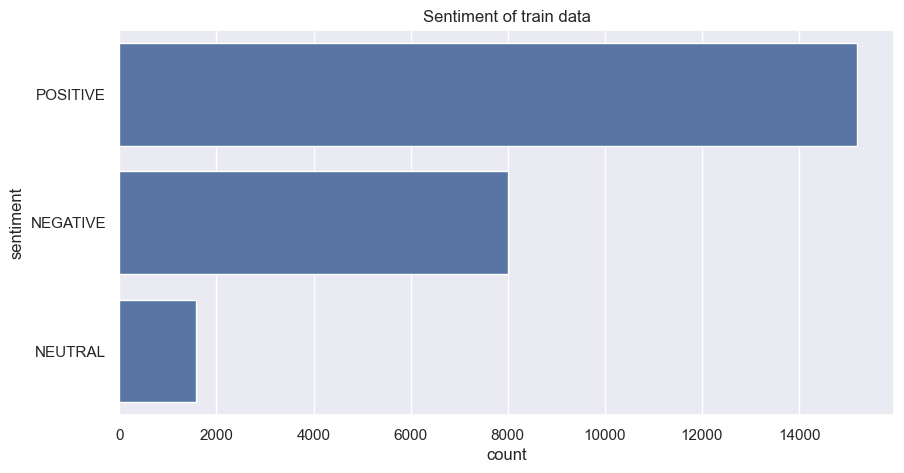

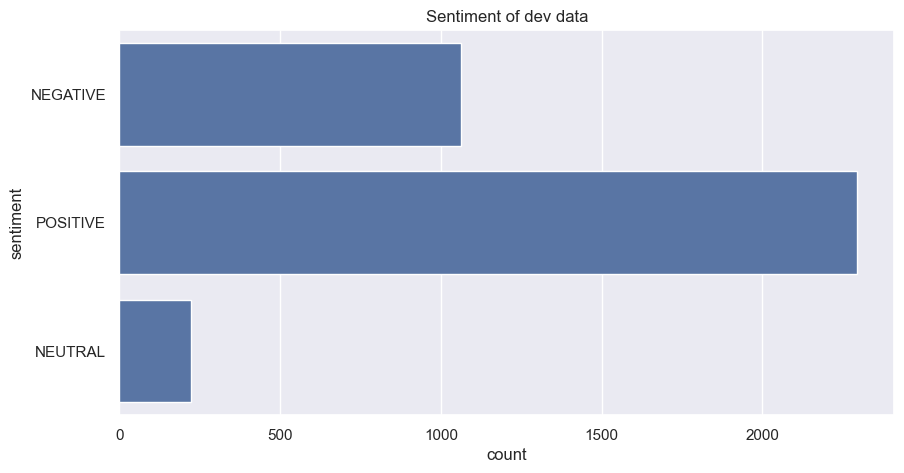

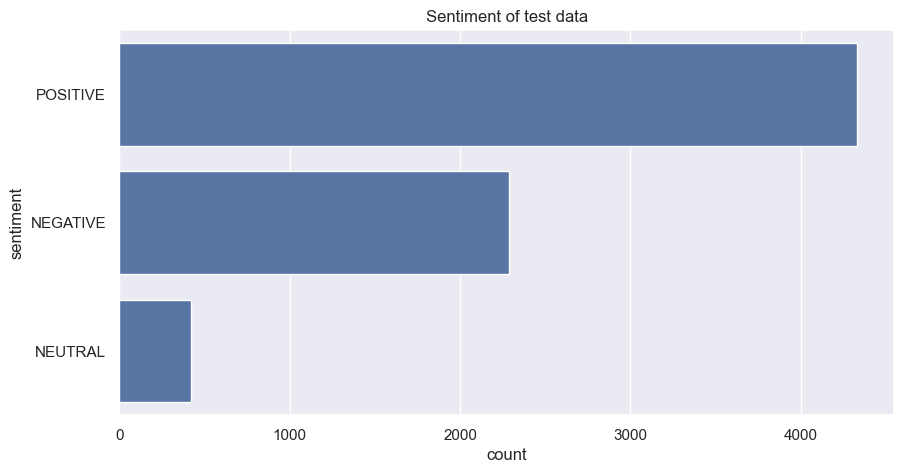

In [15]:
# analyze sentiment
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_sentiment(df, title='Sentiment'):
    plt.figure(figsize=(10, 5))

    # title
    plt.title(title)

    sns.set(style="darkgrid")
    sns.countplot(df.sentiment)
    plt.show()

analyze_sentiment(df_sentiment_train, 'Sentiment of train data')
analyze_sentiment(df_sentiment_dev, 'Sentiment of dev data')
analyze_sentiment(df_sentiment_test, 'Sentiment of test data')

In [16]:
# save data
import os

def save_data_to_jsonl(df, folder, filename):
    if not os.path.exists(folder):
        os.mkdir(folder)


    with open(os.path.join(folder, filename), 'w', encoding='utf-8') as file:

        # get all name of columns
        columns = df.columns
        for index, row in df.iterrows():
            json_obj = {}
            for column in columns:
                json_obj[column] = row[column]
            json.dump(json_obj, file, ensure_ascii=False)
            file.write('\n')

In [19]:
# save to file jsonl
save_data_to_jsonl(df_sentiment_train, 'data/sentiment_analysis_data', 'train.jsonl')
save_data_to_jsonl(df_sentiment_test, 'data/sentiment_analysis_data', 'test.jsonl')
save_data_to_jsonl(df_sentiment_dev, 'data/sentiment_analysis_data', 'dev.jsonl')

# End